In [3]:
import math, itertools
import mpmath as mp
import matplotlib.pyplot as plt

def closed_saw_counts(max_length):
    """Enumerate closed self-avoiding walks on Z^2 that start/finish at origin.
       Returns dict length -> count."""
    moves = [(1,0),(-1,0),(0,1),(0,-1)]
    counts={}
    def dfs(step, n, pos, visited):
        if step==n:
            return 1 if pos==(0,0) else 0
        total=0
        for dx,dy in moves:
            nxt=(pos[0]+dx,pos[1]+dy)
            # avoid revisiting except possibly final return to origin
            if nxt in visited and not (step+1==n and nxt==(0,0)):
                continue
            if step+1<n and nxt==(0,0):
                continue
            visited.add(nxt)
            total+=dfs(step+1,n,nxt,visited)
            visited.remove(nxt)
        return total
    for n in range(4,max_length+1,2):
        counts[n]=dfs(0,n,(0,0),set([(0,0)]))
    return counts

def coeffs_from_counts(counts):
    # cluster expansion coefficient a_n = P_n / n
    return {n: counts[n]/n for n in counts}

def f_cluster(beta, coeffs):
    kappa=math.tanh(beta)
    series=sum(c*(kappa**n) for n,c in coeffs.items())
    val=math.log(2)+2*math.log(math.cosh(beta))+series
    return -val

def f_exact(beta):
    K=beta
    k=1/(math.sinh(2*K)**2)
    integrand=lambda theta: math.log(math.cosh(2*K)**2 + (1/k)*math.sqrt(1+k**2-2*k*math.cos(2*theta)))
    integral=mp.quad(integrand,[0, mp.pi])
    val=math.log(2)/2 + integral/(2*math.pi)
    return -val


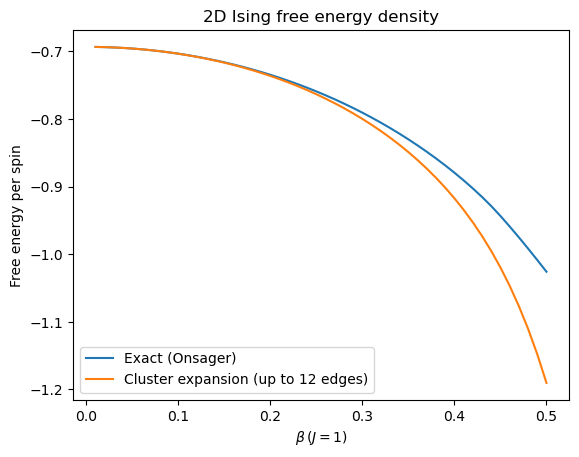

In [6]:
# enumerate polygons up to length 12
counts=closed_saw_counts(16)
coeffs=coeffs_from_counts(counts)

# beta grid
betas=[i/100 for i in range(1,51)]  # 0.01 .. 0.5
f_exact_vals=[f_exact(b) for b in betas]
f_cluster_vals=[f_cluster(b,coeffs) for b in betas]

plt.figure()
plt.plot(betas,f_exact_vals,label="Exact (Onsager)")
plt.plot(betas,f_cluster_vals,label="Cluster expansion (up to 12 edges)")
plt.xlabel(r"$\beta \, (J=1)$")
plt.ylabel("Free energy per spin")
plt.title("2D Ising free energy density")
plt.legend()
plt.show()


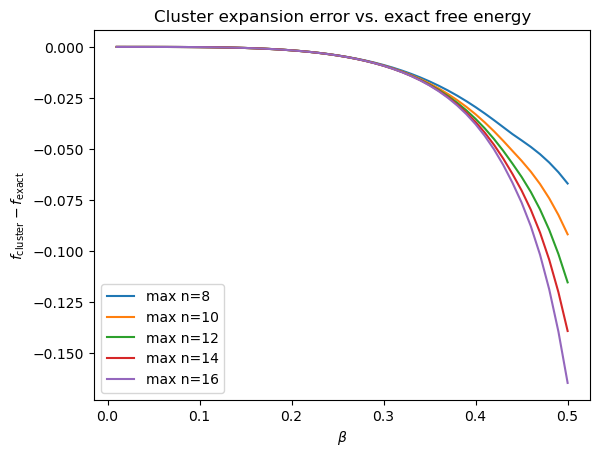

In [7]:
# Compute f_cluster_vals for counts truncated at 8, 10, 12, 14, 16
truncs = [8, 10, 12, 14, 16]
trunc_f_cluster_vals = {}
for max_n in truncs:
    coeffs_trunc = {n: coeffs[n] for n in coeffs if n <= max_n}
    vals = [f_cluster(b, coeffs_trunc) for b in betas]
    trunc_f_cluster_vals[max_n] = vals

plt.figure()
for max_n, vals in trunc_f_cluster_vals.items():
    diff = [v - e for v, e in zip(vals, f_exact_vals)]
    plt.plot(betas, diff, label=f"max n={max_n}")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$f_{\mathrm{cluster}} - f_{\mathrm{exact}}$")
plt.title("Cluster expansion error vs. exact free energy")
plt.legend()
plt.show()
